In [9]:
import pickle

In [10]:
import numpy as np

In [11]:
n_folds = 5

In [12]:
models = [
    {
        'name': 'flaubert/flaubert_small_cased',
        'label': 'flau_small_c',
        'to_print': 'FlauBERT'

    },
    {
    
        'name': 'flaubert/flaubert_base_uncased', 
        'label': 'flau_base_u'

    },
    {
        'name': 'flaubert/flaubert_base_cased',
        'label': 'flau_base_c'
    },
    {
        'name': 'flaubert/flaubert_large_cased',
        'label': 'flau_large_c'
    },
    {
        'name': 'camembert/camembert-base',
        'label': 'cam_base'
    },
    {
        'name': 'xlm-roberta-large',
        'label': 'xlm_large'
    },
    {
    
        'name': 'xlm-roberta-base', 
        'label': 'xlm_base'

    },
    {
        'name': 'bert-base-multilingual-uncased',
        'label': 'bert_base_u'
    },
    {
        'name': 'distilbert-base-multilingual-cased',
        'label': 'distilbert_base',
        'to_print': 'DistilBERT'
        
    },
    {
        'name': 'bert-base-multilingual-cased',
        'label': 'bert_base_c'
    }
    
]

In [13]:
labels = [x['label'] for x in models]

In [14]:
tasks = [
    'gender_noun',
    'gender_adj',
    'gender_na',
    'number_noun',
    'number_adj',
    'number_na',
    'pos_noun',
    'pos_adj',
    'pos_verb',
    'semantic_person',
    'semantic_act'
]

In [15]:
def get_stable_dims(label, task):
    with open(f'../Data/best_results/{task}_dims.pickle', 'rb') as f:
        dims = pickle.load(f)

    with open(f'../Data/best_results/{task}_accs.pickle', 'rb') as f:
        accs = pickle.load(f)

    with open(f'../Data/best_results/{task}_medians.pickle', 'rb') as f:
        medians = pickle.load(f)
    
    all_best_dims = []
    for i in range(n_folds):
        test = {k: v[i] for k, v in accs[label].items()}
        all_best_dims.extend(dims[label][max(test, key=test.get)][i])
        
    d, c = np.unique(all_best_dims, return_counts=True)
    
    stable_dims = [x[0] for x in zip(d,c) if x[1] == n_folds]
    
    return stable_dims

# FlauBERT small

In [16]:
# Dims representing gender for nouns
gn = get_stable_dims(labels[0], tasks[0])

In [146]:
len(get_stable_dims(labels[3], tasks[9]))

63

In [151]:
get_stable_dims(labels[5], tasks[8])

[42]

In [144]:
# Dims representing number for nouns
nn = get_stable_dims(labels[0], tasks[3])

In [159]:
act = get_stable_dims(labels[3], tasks[-1])

In [160]:
person = get_stable_dims(labels[3], tasks[-2])

In [161]:
# Dims representing POS for nouns
posn = get_stable_dims(labels[3], tasks[6])

In [148]:
posv = get_stable_dims(labels[0], tasks[8])

In [149]:
posa = get_stable_dims(labels[0], tasks[7])

/Users/egoliakova/anaconda3/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


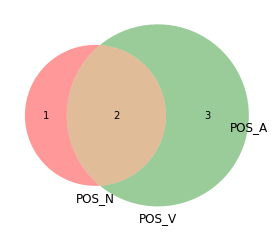

In [129]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(posn).difference(posv).difference(posa)),
                 len(set(posv).difference(posn).difference(posa)),
                len(set(posn).intersection(posv)),
                len(set(posa).difference(posn).difference(posv)),
                len(set(posa).intersection(posn)),
                len(set(posa).intersection(posv)),
                len(set(posa).intersection(posn).intersection(posv))

), set_labels = ('POS_N', 'POS_V', 'POS_A'))
plt.show()


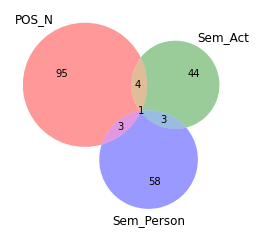

In [162]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(posn).difference(act).difference(person)),
                 len(set(act).difference(posn).difference(person)),
                len(set(posn).intersection(act)),
                len(set(person).difference(posn).difference(act)),
                len(set(person).intersection(posn)),
                len(set(person).intersection(act)),
                len(set(person).intersection(act).intersection(posn))

), set_labels = ('POS_N', 'Sem_Act', 'Sem_Person'))
plt.show()


In [166]:
from venny4py.venny4py import *


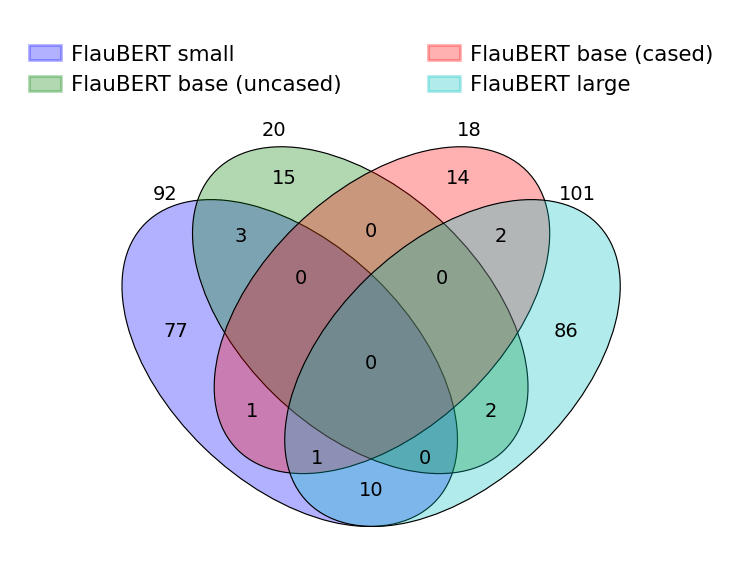

In [197]:
sets = {
    'FlauBERT small': set(get_stable_dims(labels[0], tasks[6])),
    'FlauBERT base (uncased)': set(get_stable_dims(labels[1], tasks[6])),
    'FlauBERT base (cased)': set(get_stable_dims(labels[2], tasks[6])),
    'FlauBERT large': set(get_stable_dims(labels[3], tasks[6]))}
    
venny4py(sets)

In [195]:
set(get_stable_dims(labels[3], tasks[6])).\
intersection(get_stable_dims(labels[2], tasks[6])).\
intersection(get_stable_dims(labels[0], tasks[6]))

{55}

In [188]:
get_stable_dims(labels[-4], tasks[4])

[467]

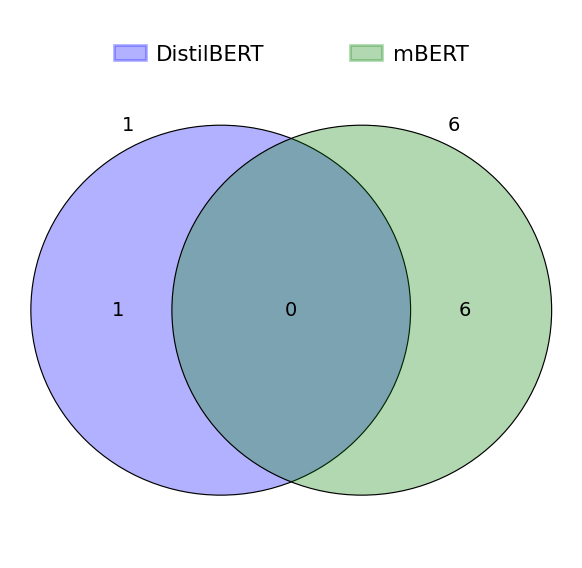

In [193]:
sets = {
    'DistilBERT': set(get_stable_dims(labels[-2], tasks[-2])),
    'mBERT': set(get_stable_dims(labels[-1], tasks[-2]))}
    
venny4py(sets)

In [10]:
small_number = get_stable_dims(labels[0], tasks[0])

In [11]:
large_number = get_stable_dims(labels[3], tasks[0])

In [12]:
import sys
sys.path.append('../Util')
import pickle
import os
from evaluation import correlation, lr, perceptron, get_anova_dims, get_mi_dims
from preparation import prepare_dataset, read_datasets

In [13]:
noun_we_with_features = read_datasets(
                            path = '../Data',
                            model_labels = [labels[0], labels[3]],
                            file_name = 'all_nouns_we.csv'
                    )

In [18]:
noun_we_with_features[0][[str(x) for x in small_number]]

,0,5,7,20,25,28,30,36,40,42,...,468,470,477,488,490,495,497,499,501,507
Word,,,,,,,,,,,,,,,,,,,,,
2D,0.604941,0.516841,0.839442,0.657252,0.211349,0.699386,0.566703,0.576386,0.849378,0.567241,...,0.506556,0.739089,0.391291,0.551140,0.520236,0.711586,0.686547,0.521273,0.648204,0.641646
3D,0.530925,0.476150,0.798304,0.589133,0.338600,0.736875,0.582803,0.515398,0.629531,0.614151,...,0.465387,0.659181,0.405725,0.449752,0.538364,0.547420,0.684433,0.370758,0.673958,0.626886
a,0.419682,0.238684,0.842866,0.466182,0.402161,0.510763,0.502206,0.575869,0.658603,0.580329,...,0.484215,0.639519,0.302538,0.567092,0.631402,0.582693,0.380816,0.400404,0.477945,0.360873
aa,0.609049,0.468887,0.471015,0.655071,0.186708,0.414618,0.584539,0.577050,0.372470,0.614813,...,0.203015,0.687001,0.471063,0.565766,0.550389,0.600460,0.295403,0.374014,0.480402,0.366734
aba,0.575708,0.290248,0.412925,0.525287,0.267690,0.474235,0.645837,0.237037,0.453203,0.558885,...,0.501422,0.509055,0.191288,0.442688,0.518086,0.562255,0.608919,0.431093,0.598233,0.373279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
φ,0.569453,0.370798,0.771049,0.568043,0.587119,0.286196,0.752652,0.421019,0.491490,0.507619,...,0.385423,0.840384,0.414020,0.782279,0.514525,0.618745,0.623699,0.386764,0.610358,0.922581
χ,0.484681,0.337136,0.627461,0.452392,0.513576,0.552749,0.604492,0.417658,0.527191,0.439850,...,0.568099,0.618103,0.287975,0.534304,0.363082,0.654161,0.478991,0.537165,0.482148,0.850108
ψ,0.550456,0.434920,0.614926,0.538788,0.625188,0.342935,0.646116,0.564382,0.437501,0.440867,...,0.319171,0.761207,0.423105,0.810729,0.525487,0.674644,0.700603,0.420424,0.594078,0.954918


In [17]:
noun_we_with_features[0].columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '506', '507', '508', '509', '510', '511', 'Number', 'Gender', 'Lemma',
       'Semantic'],
      dtype='object', length=516)

In [22]:
small_nouns = noun_we_with_features[0][
    (noun_we_with_features[0].Number != 'invariable') &
    (noun_we_with_features[0].Gender != 'invariable')
]

In [28]:
small_nouns_s = small_nouns[small_nouns.Number == 'singular']

In [37]:
small_nouns_p = small_nouns[small_nouns.Number == 'plural']

In [33]:
small_nouns_s[[str(x) for x in small_number]].median()

0      0.470298
5      0.424001
7      0.549372
20     0.495752
25     0.413721
         ...   
495    0.498201
497    0.544832
499    0.487704
501    0.449475
507    0.493383
Length: 100, dtype: float64

In [39]:
small_nouns_p[[str(x) for x in small_number]].median()

0      0.445725
5      0.362244
7      0.525469
20     0.493966
25     0.462242
         ...   
495    0.565439
497    0.557918
499    0.450773
501    0.422954
507    0.548314
Length: 100, dtype: float64

In [40]:
import matplotlib.pyplot as plt

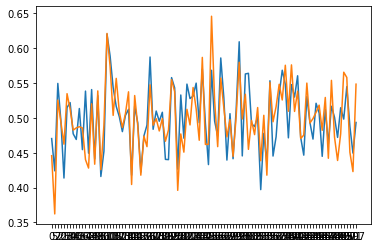

In [41]:
plt.plot(small_nouns_s[[str(x) for x in small_number]].median())
plt.plot(small_nouns_p[[str(x) for x in small_number]].median())

In [42]:
import seaborn as sns

In [43]:
sns.plot(data=small_nouns.iloc[:, :-3], hue='Number')

AttributeError: module 'seaborn' has no attribute 'plot'

In [44]:
sns.histplot(data=small_nouns.iloc[:, :-3], hue='Number')

ValueError: The following variable cannot be assigned with wide-form data: `hue`